In [5]:
#A1
import pandas as pd
import numpy as np

# Load the dataset from the Excel file
data = 'C:\\Users\\Jyoshitha\\Downloads\\training_mathbert.xlsx'
data_frame = pd.read_excel(data)

# Show the data types for each column
print("Column data types:")
print(data_frame.dtypes)

# Filter to only include numeric columns (assuming features are numeric)
numeric_data_frame = data_frame.select_dtypes(include=[np.number])

# Feature matrix (all columns except the last one)
features = numeric_data_frame.iloc[:, :-1].values  # Input features

# Transform the output column based on a condition (marks > 4 = class 1, else class 0)
target = numeric_data_frame.iloc[:, -1].apply(lambda val: 1 if val > 4 else 0).values  # Binary target

# Define the class labels
label_0 = 0
label_1 = 1

# Extract features for each class
features_class_0 = features[target == label_0]  # Features for class 0
features_class_1 = features[target == label_1]  # Features for class 1

# Verify that both classes have samples before proceeding
if features_class_0.size == 0 or features_class_1.size == 0:
    print("One of the classes lacks samples in the dataset.")
else:
    # Compute the mean vectors for both classes
    mean_vector_class_0 = np.mean(features_class_0, axis=0)
    mean_vector_class_1 = np.mean(features_class_1, axis=0)

    # Compute the standard deviation for both classes (intraclass variation)
    std_dev_class_0 = np.std(features_class_0, axis=0)
    std_dev_class_1 = np.std(features_class_1, axis=0)

    # Measure the distance between the mean vectors of both classes (interclass distance)
    interclass_dist = np.linalg.norm(mean_vector_class_0 - mean_vector_class_1)

    # Calculate the average intraclass variation for each class
    avg_intraclass_spread_0 = np.mean(std_dev_class_0)
    avg_intraclass_spread_1 = np.mean(std_dev_class_1)

    # Output the results
    print(f"Mean vector for class {label_0}: {mean_vector_class_0}")
    print(f"Standard deviation (intraclass variation) for class {label_0}: {std_dev_class_0}")
    print(f"Mean vector for class {label_1}: {mean_vector_class_1}")
    print(f"Standard deviation (intraclass variation) for class {label_1}: {std_dev_class_1}")

    print(f"\nAverage intraclass spread for class {label_0}: {avg_intraclass_spread_0}")
    print(f"Average intraclass spread for class {label_1}: {avg_intraclass_spread_1}")

    print(f"\nInterclass distance between class {label_0} and class {label_1}: {interclass_dist}")


Column data types:
embed_0      float64
embed_1      float64
embed_2      float64
embed_3      float64
embed_4      float64
              ...   
embed_380    float64
embed_381    float64
embed_382    float64
embed_383    float64
output       float64
Length: 385, dtype: object
Mean vector for class 0: [-0.16178381  0.13812738  0.10226065  0.19516905 -0.48733078 -0.16716397
  0.16517503  0.12113599  0.13878294 -0.04885382  0.22618099 -0.11433163
  0.14412876  0.00944816 -0.09964318  0.13148485 -0.41515558  0.02742206
 -0.44415512 -0.14152168  0.00178163 -0.29995148 -0.26091812  0.00777561
  0.17795761  0.18106569 -0.02567372  0.16905526  0.17460329 -0.06055543
  0.25434797  0.03666954  0.27286814 -0.14568974 -0.02955144 -0.10904295
 -0.14620488  0.24662976  0.06806287  0.11727909  0.00272976  0.09638979
  0.16405689  0.06291964  0.21235495 -0.15924611  0.0166914   0.21707121
  0.08020419 -0.04763618 -0.0405128   0.15303881  0.03554548 -0.13541503
 -0.18983764 -0.04207689 -0.04195733 -0.1

Initial rows of the DataFrame:
    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.089926  0.343874  0.176382  0.169358 -0.413337 -0.276315  0.188070   
1  0.303261  0.084930  0.047369 -0.017244 -0.524733 -0.104934  0.335107   
2 -0.274291  0.216801  0.029110  0.259279 -0.655594 -0.289643  0.073369   
3  0.118676  0.095572  0.157358  0.225097 -0.632885 -0.125629  0.204013   
4  0.298772  0.300674  0.366119 -0.022142 -0.748852 -0.035268  0.277504   

    embed_7   embed_8   embed_9  ...  embed_375  embed_376  embed_377  \
0  0.094621  0.330203 -0.258730  ...  -0.272278  -0.230662   0.173143   
1 -0.081476  0.213762 -0.105293  ...  -0.310262  -0.090271   0.129022   
2  0.014463  0.104336 -0.014190  ...  -0.464926  -0.117493  -0.118993   
3  0.074028  0.149310 -0.147779  ...  -0.030543  -0.100965   0.236099   
4  0.075697  0.055439 -0.200804  ...  -0.149575  -0.230057   0.296528   

   embed_378  embed_379  embed_380  embed_381  embed_382  embed_383  output  
0

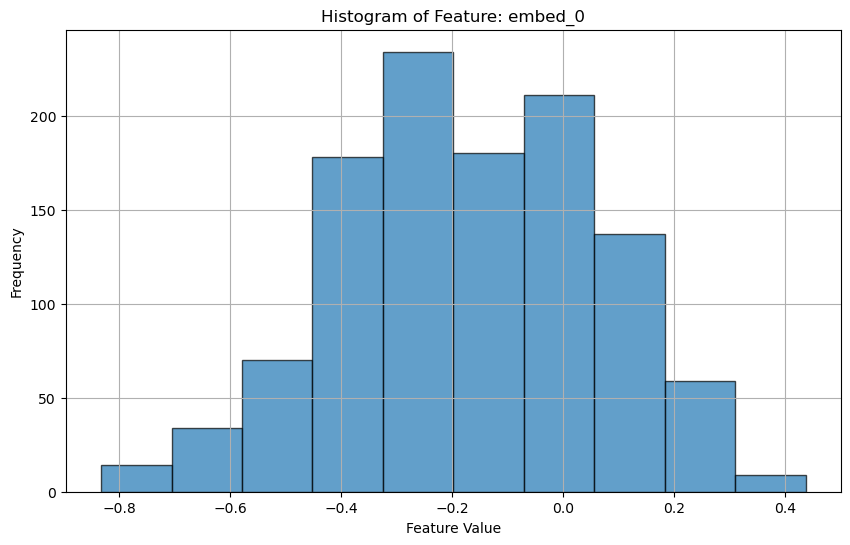

Mean of embed_0: -0.17029445322602035
Variance of embed_0: 0.05343827792925807


In [7]:
#A2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Show the initial rows of the DataFrame
print("Initial rows of the DataFrame:")
print(data_frame.head())

# Select a specific feature for analysis (e.g., the first feature in the DataFrame)
selected_feature = data_frame.columns[0]  # Adjust this as needed
selected_data = data_frame[selected_feature].dropna().values  # Exclude missing values

# Compute histogram data using 10 bins
hist_values, bin_limits = np.histogram(selected_data, bins=10)

# Create the histogram plot with 10 bins
plt.figure(figsize=(10, 6))
plt.hist(selected_data, bins=10, edgecolor='black', alpha=0.7)
plt.title(f'Histogram of Feature: {selected_feature}')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the mean and variance of the selected feature
mean_feature_value = np.mean(selected_data)
variance_feature_value = np.var(selected_data)

# Display the mean and variance
print(f"Mean of {selected_feature}: {mean_feature_value}")
print(f"Variance of {selected_feature}: {variance_feature_value}")


Column data types:
embed_0      float64
embed_1      float64
embed_2      float64
embed_3      float64
embed_4      float64
              ...   
embed_380    float64
embed_381    float64
embed_382    float64
embed_383    float64
output       float64
Length: 385, dtype: object


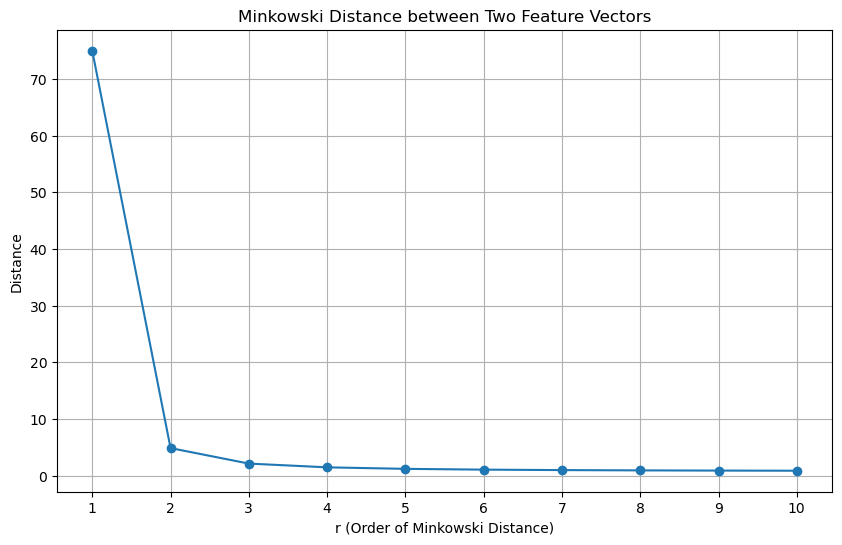

Minkowski Distance with r=1: 74.95742171496386
Minkowski Distance with r=2: 4.853526524381676
Minkowski Distance with r=3: 2.1203722613951492
Minkowski Distance with r=4: 1.4584931354061539
Minkowski Distance with r=5: 1.190435477588291
Minkowski Distance with r=6: 1.0528731355695171
Minkowski Distance with r=7: 0.9721489546673521
Minkowski Distance with r=8: 0.9205544826749266
Minkowski Distance with r=9: 0.8855801677671697
Minkowski Distance with r=10: 0.8608338902669797


In [9]:
#A3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

# Show the data types of each column
print("Column data types:")
print(data_frame.dtypes)

# Filter to include only numeric columns (assuming features are numeric)
numeric_features = data_frame.select_dtypes(include=[np.number])

# Select two feature vectors (e.g., the first and second rows of the dataset, excluding the target column if needed)
feature_vector1 = numeric_features.iloc[0].values
feature_vector2 = numeric_features.iloc[1].values

# Replace NaN values with 0 in the vectors
feature_vector1 = np.nan_to_num(feature_vector1)
feature_vector2 = np.nan_to_num(feature_vector2)

# Define a range for the parameter r (from 1 to 10)
r_range = np.arange(1, 11)

# Compute Minkowski distances for each r value
minkowski_distances = []
for r in r_range:
    try:
        dist = minkowski(feature_vector1, feature_vector2, p=r)
        minkowski_distances.append(dist)
    except ValueError as error:
        print(f"Error with r={r}: {error}")
        minkowski_distances.append(np.nan)

# Plot the Minkowski distances against r values
plt.figure(figsize=(10, 6))
plt.plot(r_range, minkowski_distances, marker='o')
plt.title('Minkowski Distance between Two Feature Vectors')
plt.xlabel('r (Order of Minkowski Distance)')
plt.ylabel('Distance')
plt.grid(True)
plt.xticks(r_range)
plt.show()

# Output the Minkowski distances for each r value
for r, dist in zip(r_range, minkowski_distances):
    print(f"Minkowski Distance with r={r}: {dist}")


In [11]:
#A4
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Examine the DataFrame columns
print("Columns in DataFrame:", data_frame.columns)

# Selecting input features and target variable
try:
    # Replace 'feature1', 'feature2', 'feature3' with actual column names from your dataset
    features = data_frame[['feature1', 'feature2', 'feature3']]
    target = data_frame['target']  # Replace 'target' with the actual name of the target column
except KeyError as error:
    print(f"Column not found: {error}")

# Ensure the target has only two classes for binary classification
try:
    unique_classes = target.unique()
    print("Unique classes in target:", unique_classes)
    chosen_classes = unique_classes[:2]  # Select the first two unique classes
    filtered_data_frame = data_frame[data_frame['target'].isin(chosen_classes)]  # Filter DataFrame by chosen classes
    features = filtered_data_frame[['feature1', 'feature2', 'feature3']]  # Update features with filtered data
    target = filtered_data_frame['target']  # Update target with filtered data
except Exception as error:
    print(f"Error filtering classes: {error}")

# Splitting the dataset into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Test set size: {X_test.shape[0]} samples")
    print("X_train dimensions:", X_train.shape)
    print("X_test dimensions:", X_test.shape)
    print("y_train dimensions:", y_train.shape)
    print("y_test dimensions:", y_test.shape)
except Exception as error:
    print(f"Error during train-test split: {error}")


Columns in DataFrame: Index(['embed_0', 'embed_1', 'embed_2', 'embed_3', 'embed_4', 'embed_5',
       'embed_6', 'embed_7', 'embed_8', 'embed_9',
       ...
       'embed_375', 'embed_376', 'embed_377', 'embed_378', 'embed_379',
       'embed_380', 'embed_381', 'embed_382', 'embed_383', 'output'],
      dtype='object', length=385)
Column not found: "None of [Index(['feature1', 'feature2', 'feature3'], dtype='object')] are in the [columns]"
Error filtering classes: 'numpy.ndarray' object has no attribute 'unique'
Training set size: 788 samples
Test set size: 338 samples
X_train dimensions: (788, 384)
X_test dimensions: (338, 384)
y_train dimensions: (788,)
y_test dimensions: (338,)


In [13]:
#A5
from sklearn.neighbors import KNeighborsClassifier

# Initialize the kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training dataset
knn_classifier.fit(X_train, y_train)

# Output the model details
print("kNN classifier has been trained with k=3")


kNN classifier has been trained with k=3


In [15]:
#A6
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming features_train, features_test, target_train, target_test are already defined

# Initialize the kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Evaluate the kNN classifier's accuracy on the test dataset
test_accuracy = knn_classifier.score(X_test, y_test)

# Display the accuracy of the kNN classifier
print(f"Accuracy of kNN classifier on the test dataset: {test_accuracy * 100:.2f}%")

# Generate predictions on the test dataset
predictions = knn_classifier.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy of kNN classifier on the test dataset: 80.18%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       268
           1       0.52      0.53      0.52        70

    accuracy                           0.80       338
   macro avg       0.70      0.70      0.70       338
weighted avg       0.80      0.80      0.80       338



In [17]:
#A7
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming features_train, features_test, target_train, and target_test are already defined

# Instantiate the kNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # n_neighbors can be adjusted as needed

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predict labels for the test data
predicted_labels = knn_model.predict(X_test)

# Compute the accuracy score
model_accuracy = accuracy_score(y_test, predicted_labels)

# Display the accuracy as a percentage
print(f'Accuracy: {model_accuracy:.2%}')  # Accuracy displayed as a percentage


Accuracy: 80.18%


In [19]:
#A7_cond
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
features_train_scaled = scaler.fit_transform(X_train)
features_test_scaled = scaler.transform(X_test)

# Step 2: Train the kNN classifier
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(features_train_scaled, y_train)

# Step 3: Predict the labels for the scaled test data
predicted_labels = knn_classifier.predict(features_test_scaled)

# Display the predicted labels for the test dataset
print("Predicted labels for the test dataset:")
print(predicted_labels)

# Step 4: Predict the label for a single test sample (e.g., the first one)
single_test_vector = features_test_scaled[0].reshape(1, -1)
single_predicted_label = knn_classifier.predict(single_test_vector)

print(f"Predicted label for the first test sample: {single_predicted_label}")


Predicted labels for the test dataset:
[0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0]
Predicted label for the first test sample: [0]


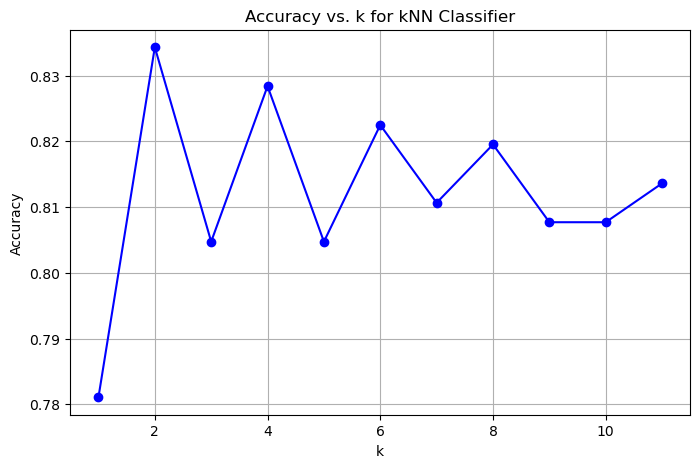

Accuracy for Nearest Neighbor (k=1): 0.7811
Accuracy for k=3: 0.8047


In [21]:
#A8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the range of k values to test
k_range = range(1, 12)  # Testing k from 1 to 11
accuracy_results = []

for k in k_range:
    # Initialize the kNN classifier with the current k value
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(features_train_scaled, y_train)

    # Make predictions on the scaled test data
    predictions = knn_model.predict(features_test_scaled)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    accuracy_results.append(accuracy)

# Plot the accuracy scores for different k values
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracy_results, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k for kNN Classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Output the accuracy for k=1 (Nearest Neighbor) and k=3
print(f"Accuracy for Nearest Neighbor (k=1): {accuracy_results[0]:.4f}")
print(f"Accuracy for k=3: {accuracy_results[2]:.4f}")


In [23]:
#A9
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict labels on the training data
train_predictions = knn_classifier.predict(features_train_scaled)

# Predict labels on the test data
test_predictions = knn_classifier.predict(features_test_scaled)

# Compute and display the confusion matrix for the training data
training_conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix for Training Set:")
print(training_conf_matrix)

# Compute and display the confusion matrix for the test data
testing_conf_matrix = confusion_matrix(y_test, test_predictions)
print("\nConfusion Matrix for Test Set:")
print(testing_conf_matrix)

# Calculate and print Precision, Recall, and F1-Score for the training data
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)

print("\nTraining Set Metrics:")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")

# Calculate and print Precision, Recall, and F1-Score for the test data
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)

print("\nTest Set Metrics:")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")

# Evaluate model fit by comparing training and test accuracies
train_accuracy = knn_classifier.score(features_train_scaled, y_train)
test_accuracy = knn_classifier.score(features_test_scaled, y_test)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy + 0.1:
    print("The model is likely overfitting (high training accuracy, low test accuracy).")
elif test_accuracy > train_accuracy + 0.1:
    print("The model is likely underfitting (low training accuracy, higher test accuracy).")
else:
    print("The model has a good fit (training and test accuracy are similar).")


Confusion Matrix for Training Set:
[[560  34]
 [ 59 135]]

Confusion Matrix for Test Set:
[[235  33]
 [ 33  37]]

Training Set Metrics:
Precision: 0.7988
Recall: 0.6959
F1-Score: 0.7438

Test Set Metrics:
Precision: 0.5286
Recall: 0.5286
F1-Score: 0.5286

Training Accuracy: 0.8820
Test Accuracy: 0.8047
The model has a good fit (training and test accuracy are similar).


In [29]:
#lab04
#A1
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
import numpy as np

# Load the Excel file containing the dataset
data_path = 'C:\\Users\\Jyoshitha\\Downloads\\training_mathbert.xlsx'
data_frame = pd.read_excel(data_path)

# Convert continuous labels to binary classes for y_test
test_labels_binary = pd.cut(y_test, bins=2, labels=[0, 1])

# Predict the class labels for the test data
test_predictions = knn_model.predict(X_test)

# Compute and display the confusion matrix for the test data
test_conf_matrix = confusion_matrix(test_labels_binary, test_predictions)
print("Confusion Matrix for Test Data:\n", test_conf_matrix)

# Generate and print the classification report for the test data
test_class_report = classification_report(test_labels_binary, test_predictions)
print("\nClassification Report for Test Data:\n", test_class_report)

# Calculate and print the accuracy for the test data
test_accuracy = accuracy_score(test_labels_binary, test_predictions)
print(f"Accuracy for Test Data: {test_accuracy:.2f}")

# Predict the class labels for the training data
train_predictions = knn_model.predict(X_train)

# Convert continuous labels to binary classes for y_train
train_labels_binary = pd.cut(y_train, bins=2, labels=[0, 1])

# Compute and display the confusion matrix for the training data
train_conf_matrix = confusion_matrix(train_labels_binary, train_predictions)
print("\nConfusion Matrix for Training Data:\n", train_conf_matrix)

# Generate and print the classification report for the training data
train_class_report = classification_report(train_labels_binary, train_predictions)
print("\nClassification Report for Training Data:\n", train_class_report)

# Calculate and print the accuracy for the training data
train_accuracy = accuracy_score(train_labels_binary, train_predictions)
print(f"Accuracy for Training Data: {train_accuracy:.2f}")

# Evaluate model performance to check for underfitting, regular fit, or overfitting
if train_accuracy > test_accuracy and test_accuracy < 0.60:
    print("\nThe model may be underfitting the data.")
elif train_accuracy > test_accuracy and (train_accuracy - test_accuracy) > 0.1:
    print("\nThe model may be overfitting the data.")
else:
    print("\nThe model appears to have a regular fit.")


Confusion Matrix for Test Data:
 [[266   2]
 [ 67   3]]

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       0.80      0.99      0.89       268
           1       0.60      0.04      0.08        70

    accuracy                           0.80       338
   macro avg       0.70      0.52      0.48       338
weighted avg       0.76      0.80      0.72       338

Accuracy for Test Data: 0.80

Confusion Matrix for Training Data:
 [[593   1]
 [192   2]]

Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       594
           1       0.67      0.01      0.02       194

    accuracy                           0.76       788
   macro avg       0.71      0.50      0.44       788
weighted avg       0.73      0.76      0.65       788

Accuracy for Training Data: 0.76

The model appears to have a regular fit.


In [31]:
#A2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the data from the Excel file
data_file = 'Lab Session Data.xlsx'
data_frame = pd.read_excel(data_file, sheet_name='IRCTC Stock Price')

# Extract the actual prices from the DataFrame
actual_values = data_frame['Price'].values

# Simulate predicted prices (for demonstration only)
# Replace this with your actual predicted values
predicted_values = actual_values + np.random.normal(0, 10, len(actual_values))

# Compute evaluation metrics
mean_squared_error_value = mean_squared_error(actual_values, predicted_values)
root_mean_squared_error = np.sqrt(mean_squared_error_value)
mean_absolute_percentage_error = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
r_squared = r2_score(actual_values, predicted_values)

# Print the evaluation results
print(f'MSE: {mean_squared_error_value:.4f}')
print(f'RMSE: {root_mean_squared_error:.4f}')
print(f'MAPE: {mean_absolute_percentage_error:.4f}%')
print(f'R²: {r_squared:.4f}')


MSE: 83.3443
RMSE: 9.1293
MAPE: 0.4840%
R²: 0.9986


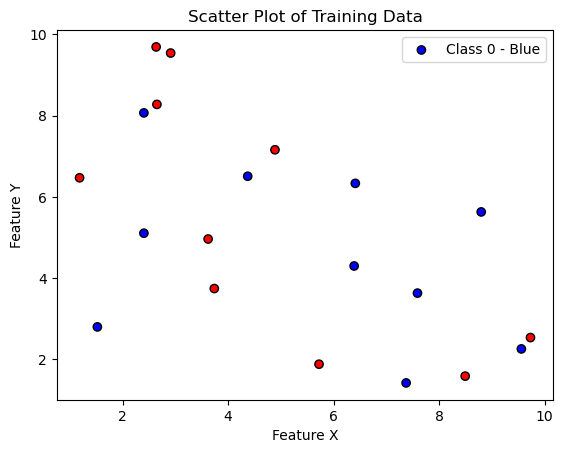

In [35]:
#A3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset from the Excel file
data_file = 'Lab Session Data.xlsx'
data_frame = pd.read_excel(data_file, sheet_name='IRCTC Stock Price')

# Set seed for reproducibility of random numbers
np.random.seed(42)

# Generate 20 random data points for X and Y, ranging between 1 and 10
feature_x = np.random.uniform(1, 10, 20)
feature_y = np.random.uniform(1, 10, 20)

# Define classes for the data points
# The first 10 points are assigned to class 0, and the next 10 to class 1
labels = np.array([0]*10 + [1]*10)

# Assign colors based on class labels
plot_colors = ['blue' if label == 0 else 'red' for label in labels]

# Create a scatter plot
plt.scatter(feature_x, feature_y, c=plot_colors, edgecolor='k')

# Label the axes
plt.xlabel('Feature X')
plt.ylabel('Feature Y')

# Add a title to the plot
plt.title('Scatter Plot of Training Data')

# Include a legend to differentiate classes
plt.legend(['Class 0 - Blue', 'Class 1 - Red'])

# Show the plot
plt.show()


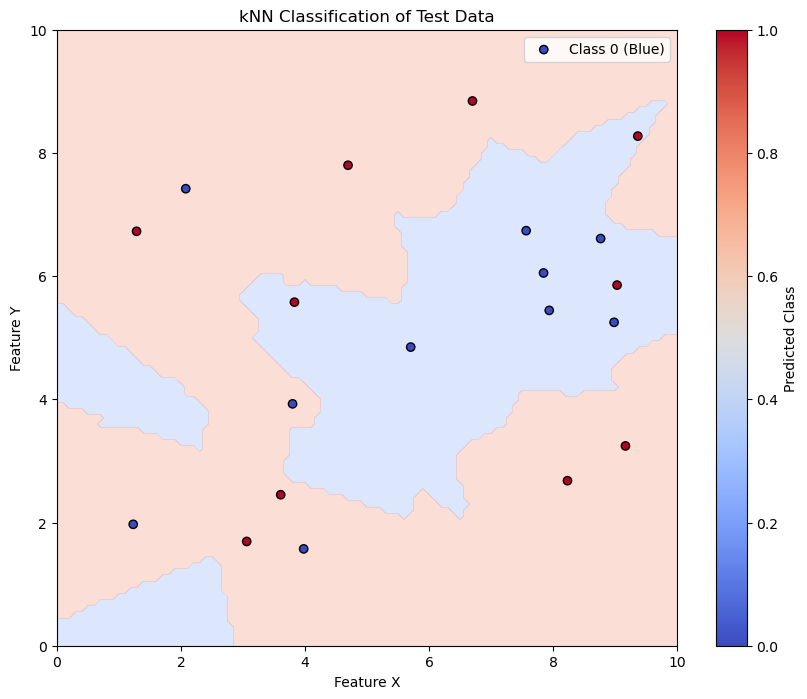

In [39]:
#A4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Generate training data for the kNN classifier
# Create 20 random training points
data_file = 'Lab Session Data.xlsx'
data_frame = pd.read_excel(data_file, sheet_name='IRCTC Stock Price')
training_features = np.random.uniform(1, 10, (20, 2))
training_labels = np.array([0]*10 + [1]*10)  # Classes 0 and 1

# Initialize and train the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_features, training_labels)

# Create a grid for test data
x_range, y_range = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
x_flat = x_range.ravel()
y_flat = y_range.ravel()
test_data = np.vstack((x_flat, y_flat)).T

# Predict classes for the test data
predicted_labels = knn.predict(test_data)

# Reshape the predictions for contour plotting
predicted_labels_reshaped = predicted_labels.reshape(x_range.shape)

# Plot the classification results
plt.figure(figsize=(10, 8))
plt.contourf(x_range, y_range, predicted_labels_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
plt.scatter(training_features[:, 0], training_features[:, 1], c=training_labels, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data')
plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
plt.colorbar(label='Predicted Class')
plt.show()


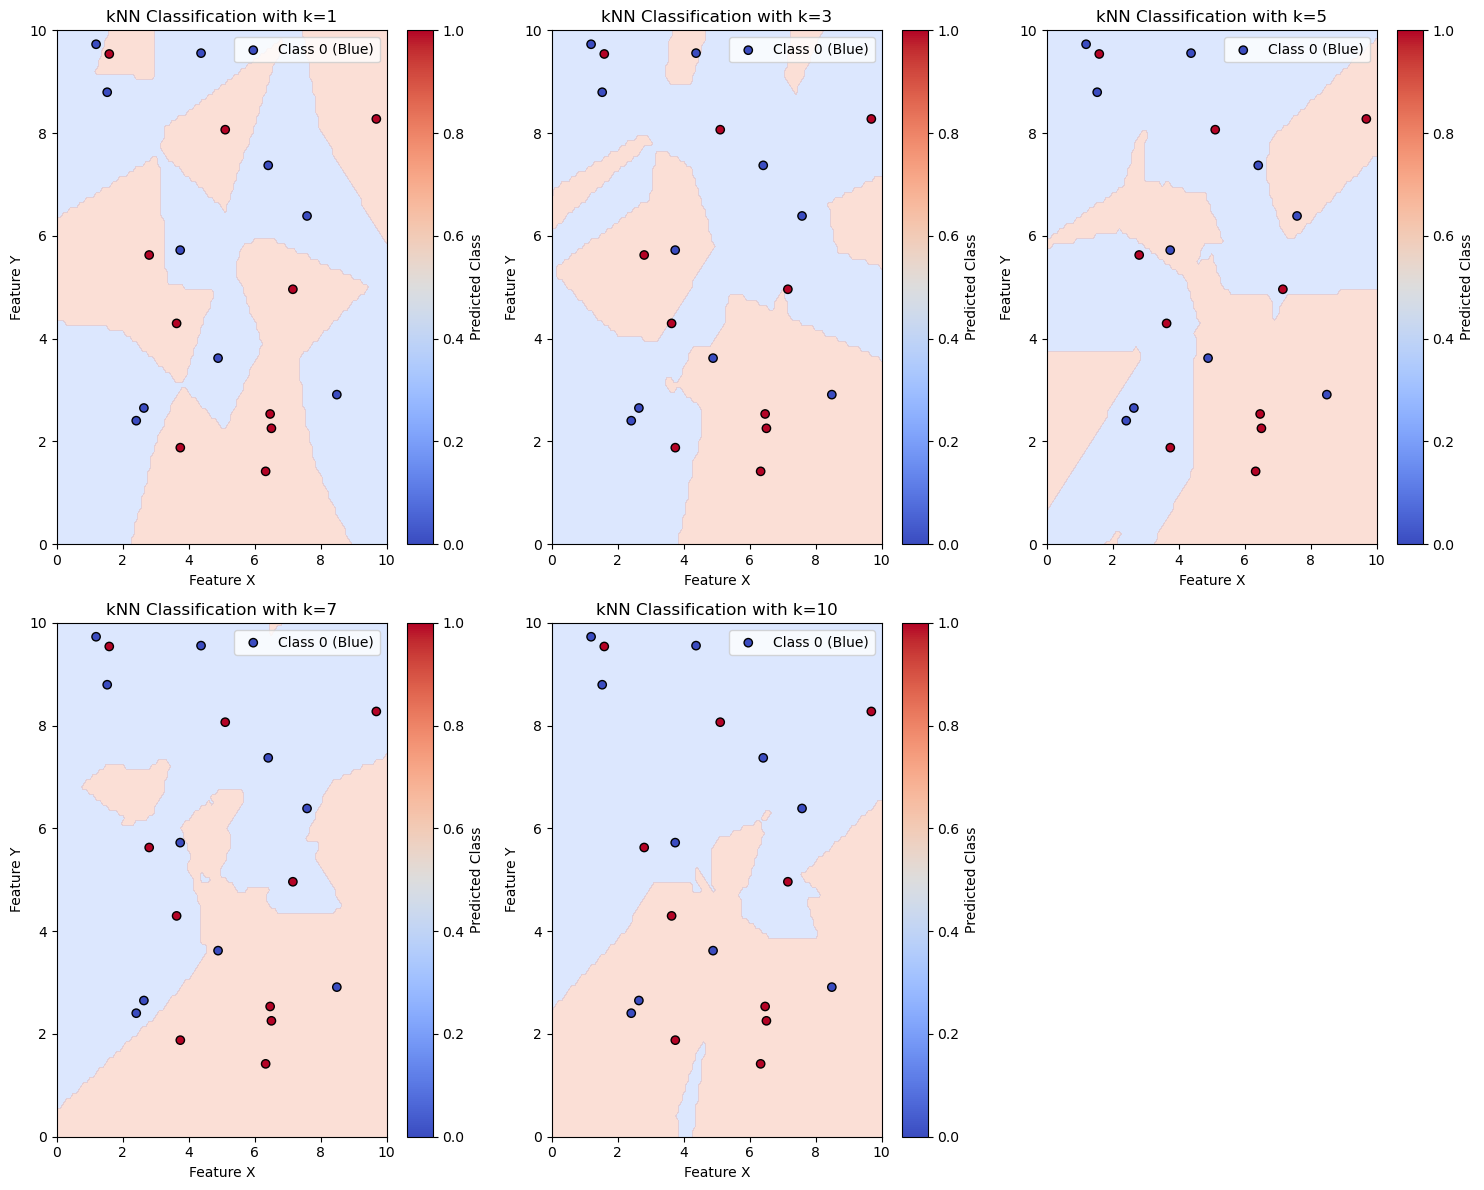

In [51]:
#A5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Load the dataset from the Excel file
data_path = 'Lab Session Data.xlsx'
data_frame = pd.read_excel(data_path, sheet_name='IRCTC Stock Price')

# Generate synthetic training data
np.random.seed(42)  # Ensures reproducibility
X_train_data = np.random.uniform(1, 10, (20, 2))
Y_train_data = np.array([0]*10 + [1]*10)  # Two classes: 0 and 1

# Define the test data set
x_test_data, y_test_data = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
x_test_flattened = x_test_data.ravel()
y_test_flattened = y_test_data.ravel()
test_points_data = np.vstack((x_test_flattened, y_test_flattened)).T

# List of k values to evaluate
k_values_list = [1, 3, 5, 7, 10]

# Create subplots to visualize the effect of different k values
plt.figure(figsize=(15, 12))
for idx, k in enumerate(k_values_list, 1):
    # Initialize and fit the kNN classifier
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_data, Y_train_data)
    
    # Predict class labels for the test data
    y_test_predictions = knn_model.predict(test_points_data)
    y_test_predictions_reshaped = y_test_predictions.reshape(x_test_data.shape)
    
    # Plot decision boundary and training data
    plt.subplot(2, 3, idx)
    plt.contourf(x_test_data, y_test_data, y_test_predictions_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
    plt.scatter(X_train_data[:, 0], X_train_data[:, 1], c=Y_train_data, edgecolor='k', marker='o', cmap='coolwarm', label='Training Data Points')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification with k={k}')
    plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
    plt.colorbar(label='Predicted Class')

# Adjust subplot layout and display
plt.tight_layout()
plt.show()


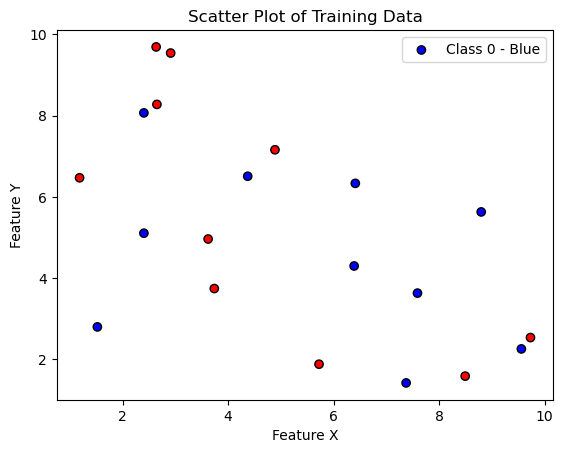

In [53]:
#A6_3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset from the Excel file
data_path = 'Lab Session Data.xlsx'
data_frame = pd.read_excel(data_path, sheet_name='IRCTC Stock Price')

# Set the random seed for reproducibility
np.random.seed(42)

# Generate 20 random data points for X and Y within the range 1 to 10
X_data = np.random.uniform(1, 10, 20)
Y_data = np.random.uniform(1, 10, 20)

# Assign class labels to the data points
# Here, we assign the first 10 points to class 0 and the remaining 10 to class 1
class_labels = np.array([0]*10 + [1]*10)

# Determine colors based on the class labels
color_map = ['blue' if label == 0 else 'red' for label in class_labels]

# Create a scatter plot to visualize the data points
plt.scatter(X_data, Y_data, c=color_map, edgecolor='k')

# Add labels to the axes
plt.xlabel('Feature X')
plt.ylabel('Feature Y')

# Add a title to the plot
plt.title('Scatter Plot of Training Data')

# Include a legend in the plot
plt.legend(['Class 0 - Blue', 'Class 1 - Red'])

# Display the scatter plot
plt.show()


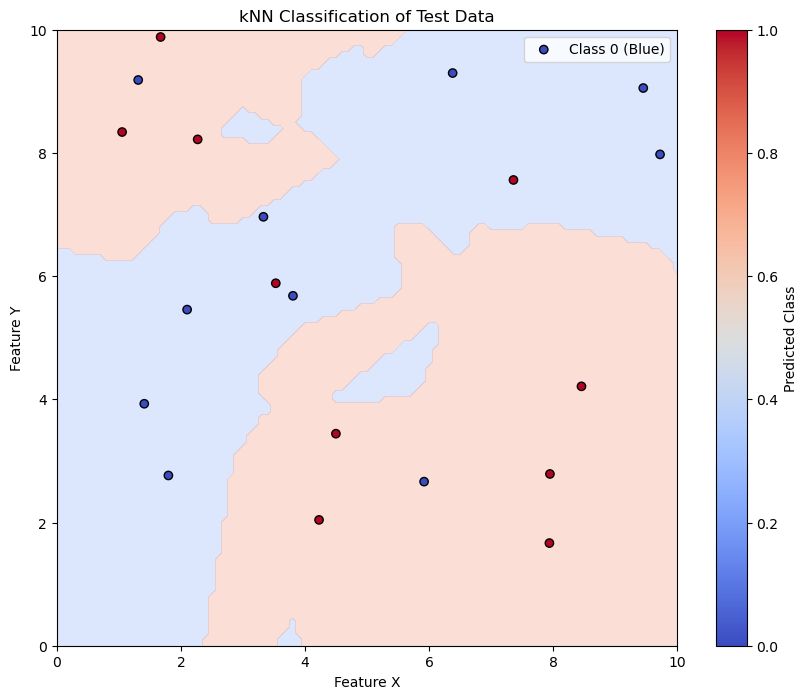

In [55]:
#A6_4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Load the dataset from the Excel file
data_path = 'Lab Session Data.xlsx'
data_frame = pd.read_excel(data_path, sheet_name='IRCTC Stock Price')

# Generate training data
X_train = np.random.uniform(1, 10, (20, 2))
Y_train = np.array([0]*10 + [1]*10)  # Assigning classes 0 and 1

# Initialize and train the kNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)

# Create a meshgrid for the test data
x_grid, y_grid = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
x_flat = x_grid.ravel()
y_flat = y_grid.ravel()
test_data = np.vstack((x_flat, y_flat)).T

# Predict class labels for the test data
predictions = knn_model.predict(test_data)

# Reshape the predictions for contour plotting
predictions_reshaped = predictions.reshape(x_grid.shape)

# Plot the decision boundary and training data
plt.figure(figsize=(10, 8))
plt.contourf(x_grid, y_grid, predictions_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.title('kNN Classification of Test Data')
plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
plt.colorbar(label='Predicted Class')
plt.show()


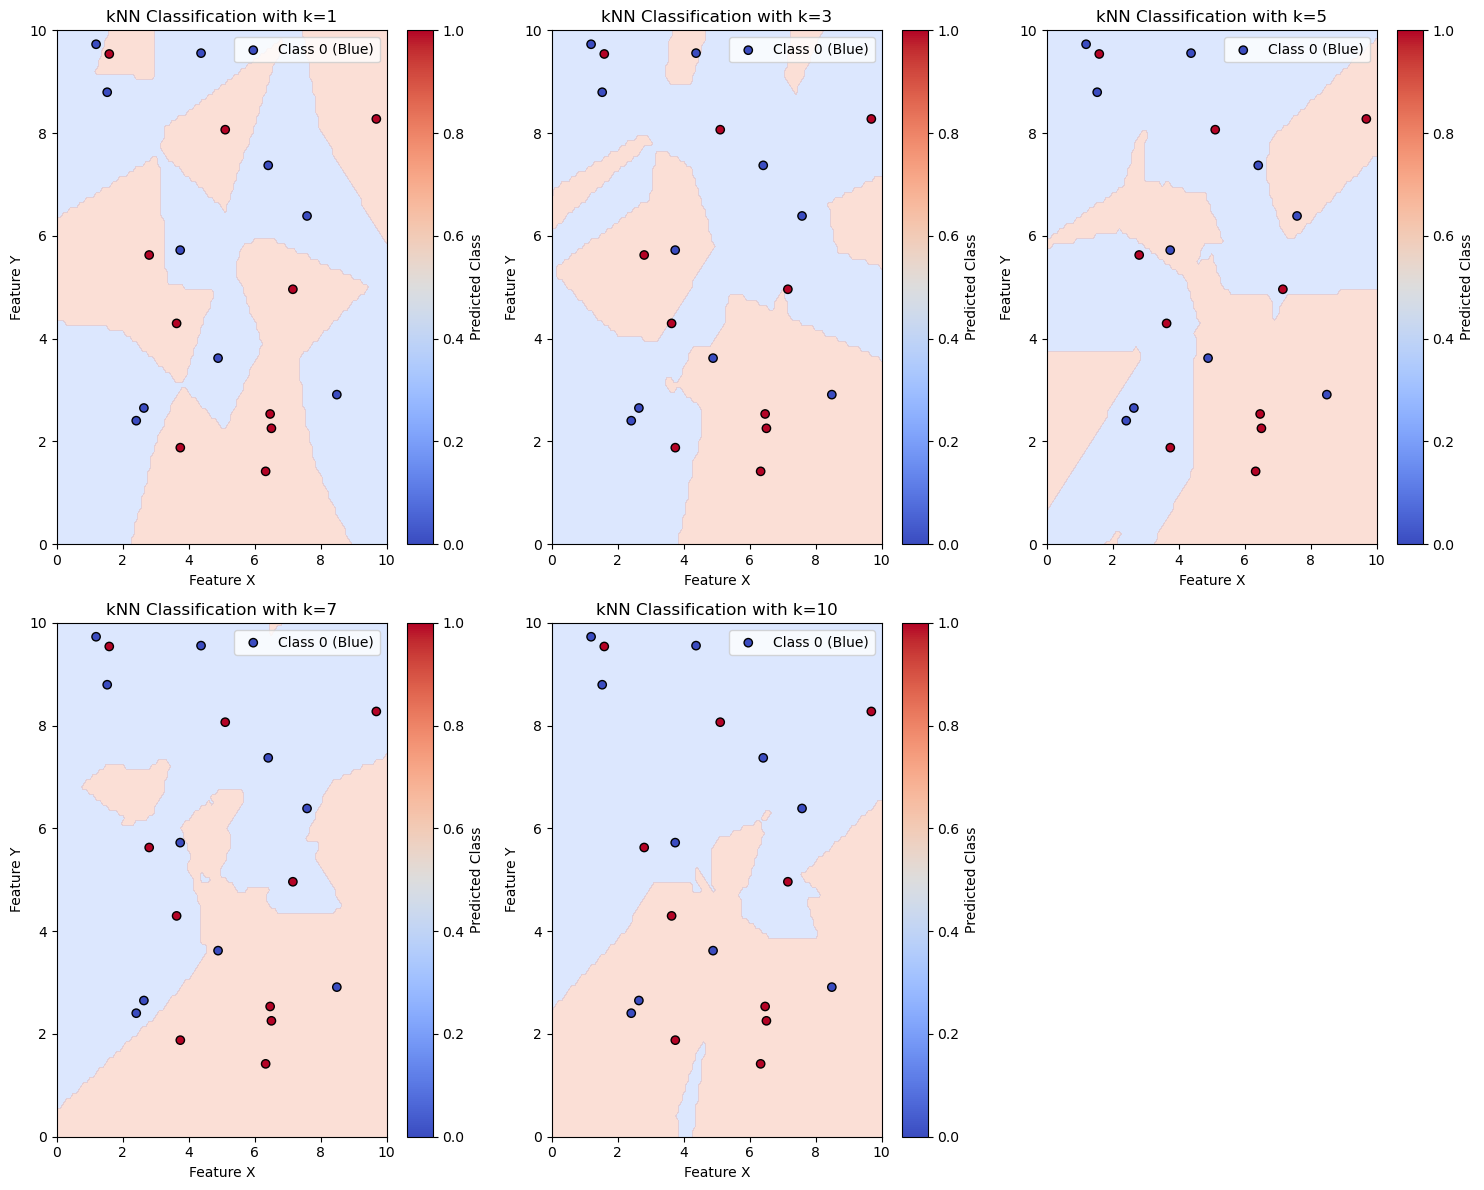

In [57]:
#A6_5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Load the dataset from the Excel file
data_path = 'Lab Session Data.xlsx'
data_frame = pd.read_excel(data_path, sheet_name='IRCTC Stock Price')

# Generate training data
np.random.seed(42)  # Ensuring reproducibility
X_train = np.random.uniform(1, 10, (20, 2))
Y_train = np.array([0]*10 + [1]*10)  # Class labels 0 and 1

# Create test data
x_grid, y_grid = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
x_flat = x_grid.ravel()
y_flat = y_grid.ravel()
test_data = np.vstack((x_flat, y_flat)).T

# List of k values to evaluate
k_values = [1, 3, 5, 7, 10]

# Create subplots for each k value
plt.figure(figsize=(15, 12))
for index, k in enumerate(k_values, 1):
    # Initialize and train the kNN classifier
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, Y_train)
    
    # Predict class labels for the test data
    predictions = knn_model.predict(test_data)
    predictions_reshaped = predictions.reshape(x_grid.shape)
    
    # Plot the decision boundary and training points
    plt.subplot(2, 3, index)
    plt.contourf(x_grid, y_grid, predictions_reshaped, cmap='coolwarm', alpha=0.3, levels=np.linspace(0, 1, 3))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, edgecolor='k', marker='o', cmap='coolwarm', label='Training Points')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification with k={k}')
    plt.legend(['Class 0 (Blue)', 'Class 1 (Red)'])
    plt.colorbar(label='Predicted Class')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


In [59]:
#A7
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset from the specified Excel file
data_path = 'C:\\Users\\Jyoshitha\\Downloads\\training_mathbert.xlsx'
data_frame = pd.read_excel(data_path)

# Specify feature columns and the target variable
feature_columns = data_frame.columns[:-1]  # All columns except the last one
target_variable = data_frame['output']

# Convert target variable to categorical if it's numeric
if np.issubdtype(data_frame['output'].dtype, np.number):
    data_frame['output'] = pd.cut(data_frame['output'], bins=2, labels=[0, 1])

# Prepare training data
X_train = data_frame[feature_columns].values
y_train = data_frame['output'].values

# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Define the parameter grid for tuning k
param_grid = {
    'n_neighbors': list(range(1, 21))  # Testing k values from 1 to 20
}

# Initialize the kNN classifier
knn_classifier = KNeighborsClassifier()

# Set up GridSearchCV with the kNN classifier and parameter grid
grid_search_cv = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV on the training data
grid_search_cv.fit(X_train, y_train)

# Retrieve the best k value and the corresponding score
optimal_k = grid_search_cv.best_params_['n_neighbors']
best_cv_score = grid_search_cv.best_score_

print(f"Optimal k value: {optimal_k}")
print(f"Best cross-validated accuracy: {best_cv_score:.4f}")

# Predict using the best model
best_knn_model = grid_search_cv.best_estimator_
y_pred_test = best_knn_model.predict(X_test)

# Assess the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test set accuracy: {test_accuracy:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimal k value: 5
Best cross-validated accuracy: 0.7741
Test set accuracy: 0.6982


In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Specify the parameter distribution for k
parameter_distribution = {
    'n_neighbors': np.arange(1, 21)  # Randomly sampling k values between 1 and 20
}

# Initialize the kNN classifier
knn_model = KNeighborsClassifier()

# Set up RandomizedSearchCV with the kNN classifier and parameter distribution
random_search_cv = RandomizedSearchCV(
    estimator=knn_model, 
    param_distributions=parameter_distribution, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    random_state=42
)

# Fit RandomizedSearchCV on the training data
random_search_cv.fit(X_train, y_train)

# Retrieve the best k value and the highest score
optimal_k = random_search_cv.best_params_['n_neighbors']
best_cv_accuracy = random_search_cv.best_score_

print(f"Optimal k value: {optimal_k}")
print(f"Best cross-validated accuracy: {best_cv_accuracy:.4f}")

# Predict with the best model
best_knn_model = random_search_cv.best_estimator_
predicted_y_test = best_knn_model.predict(X_test)

# Assess the model's accuracy on the test set
test_set_accuracy = accuracy_score(y_test, predicted_y_test)
print(f"Test set accuracy: {test_set_accuracy:.4f}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Optimal k value: 12
Best cross-validated accuracy: 0.7577
Test set accuracy: 0.7160
